In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#Let's see the data information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#We can see that there are unique values in the data. We should drop them because they are not useful for our analysis.
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [5]:
data.drop(["id"], axis=1, inplace=True)

In [6]:
#We have null datas in the bmi column.We should handle with it.
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
#We should fill it with bmi column's mean value. I choose fill this method because it is the easiest and useful way to do it.
data["bmi"].fillna(data["bmi"].mean(), inplace=True)

In [8]:
#controlling is there any null value in the data
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

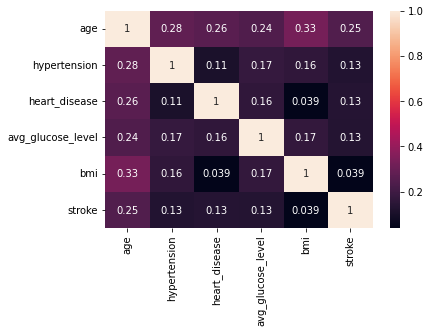

In [13]:
#show data_cat data correlation with matplotlib
sns.heatmap(data.corr(), annot=True)
plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [14]:
#we have a lot of categorical data. We should handle with it.
#We should encode them. I choose to use Catboost for classification. We can use catFeatures.
#We have to set a variabile for catFeatures. We should push categorical data's column indices to this variable.
cat_features = [0,4,5,6,9]

In [15]:
#seperate data to X and y
X = data.drop(["stroke"], axis=1)
y = data["stroke"]

In [16]:
#split data to train and test
#I am setting test_size 0.2 because we have a large data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#Import CatboostClassifier
#I choose to use Catboost because it is the most powerful algorithm.
#I can use it for classification.
#It is easily handle with categorical data.
#Catboost is very assertive in giving a good result without being tuned. So I will not tune it.

from catboost import CatBoostClassifier
clf = CatBoostClassifier(
)

#I am setting categorical features with cat_features variable.
clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_test, y_test), 
        verbose=False
)
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

#prediction on test data
y_pred = clf.predict(X_test)

#import accuracy_score from sklearn.metrics module to calculate accuracy of our model
#I use accuracy_score because it is the most common metric for accuracy score.

from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
print(acc_score)


CatBoost model is fitted: True
CatBoost model parameters:
{}
0.9393346379647749


In [ ]:
#So our accurancy score is 0.93. It is very good result. We can use it for our project. 
#It means our model gives 90% accurate result.